In [ ]:
#first we have to import all relevant Python packages
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
#load the data set
football_data=pd.read_csv("/content/Football_data_merged_cleaned_data (3).csv")

In [ ]:
football_data.head()

,appearance_id,game_id_x,player_id_x,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name_y,team_captain,position_y
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,8d717b1017e72d89d2ee1112bb2d7466,substitutes,22,Timothy Chandler,0,Right-Back
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,d53eb3fd74523d6dd4536653c145ae96,substitutes,22,Timothy Chandler,0,Right-Back
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,3efc21c645e46b2f411bcdb1710aa444,substitutes,22,Timothy Chandler,0,Right-Back
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,cc79e78c570ce19872dfed125d324407,substitutes,22,Timothy Chandler,0,Right-Back
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,21de58902f547e231bf2604be9fa996f,substitutes,22,Timothy Chandler,0,Right-Back


In [ ]:
football_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   appearance_id                4199 non-null   object 
 1   game_id_x                    4199 non-null   int64  
 2   player_id_x                  4199 non-null   int64  
 3   competition_id_x             4199 non-null   object 
 4   yellow_cards                 4199 non-null   int64  
 5   red_cards                    4199 non-null   int64  
 6   goals                        4199 non-null   int64  
 7   assists                      4199 non-null   int64  
 8   minutes_played               4199 non-null   int64  
 9   season                       4199 non-null   int64  
 10  round                        4199 non-null   object 
 11  home_club_goals              4199 non-null   int64  
 12  away_club_goals              4199 non-null   int64  
 13  home_club_position

In [ ]:
df = pd.DataFrame(football_data)

***Performance Analysis:LogisticRegression for Goals Scored ***

**Feature Selection**

In [ ]:
# Feature selection (we'll use the specified columns)
selected_columns = ['minutes_played', 'position_y', 'team_captain', 'market_value_in_eur', 'goals']
df_selected = df[selected_columns]

df_selected


,minutes_played,position_y,team_captain,market_value_in_eur,goals
0,70,Right-Back,0,700000.0,0
1,70,Right-Back,0,700000.0,0
2,70,Right-Back,0,700000.0,0
3,70,Right-Back,0,700000.0,0
4,70,Right-Back,0,700000.0,0
...,...,...,...,...,...
4194,77,Centre-Forward,0,300000.0,1
4195,77,Centre-Forward,0,300000.0,1
4196,77,Centre-Forward,0,300000.0,1
4197,77,Centre-Forward,0,300000.0,1


In [ ]:
df_selected['goals'].value_counts()

,count
goals,
0,2594
1,1461
2,102
3,42


In [ ]:
#Taking goals 1,2,3 as 1(True), 0 goals as 0(False)
df_selected['scored_goals']=(df_selected["goals"] > 0).astype(int)
print(df_selected['scored_goals'].value_counts())

scored_goals
0    2594
1    1605
Name: count, dtype: int64


In [ ]:
df_selected.drop(columns=['goals'],inplace=True)
df_selected

,minutes_played,position_y,team_captain,market_value_in_eur,scored_goals
0,70,Right-Back,0,700000.0,0
1,70,Right-Back,0,700000.0,0
2,70,Right-Back,0,700000.0,0
3,70,Right-Back,0,700000.0,0
4,70,Right-Back,0,700000.0,0
...,...,...,...,...,...
4194,77,Centre-Forward,0,300000.0,1
4195,77,Centre-Forward,0,300000.0,1
4196,77,Centre-Forward,0,300000.0,1
4197,77,Centre-Forward,0,300000.0,1


***Label Encoding***

In [ ]:
label = preprocessing.LabelEncoder()
df_selected['position_y_enc']=label.fit_transform(df_selected['position_y'])
df_selected['position_y_enc'].unique()

array([9, 2, 4, 8, 6, 3, 7, 5, 1, 0])

In [ ]:
#dropping the position_y cause the column is label encoded to position_y_enc
df_selected.drop(columns=["position_y"],inplace=True)
df_selected

,minutes_played,team_captain,market_value_in_eur,scored_goals,position_y_enc
0,70,0,700000.0,0,9
1,70,0,700000.0,0,9
2,70,0,700000.0,0,9
3,70,0,700000.0,0,9
4,70,0,700000.0,0,9
...,...,...,...,...,...
4194,77,0,300000.0,1,3
4195,77,0,300000.0,1,3
4196,77,0,300000.0,1,3
4197,77,0,300000.0,1,3


**Check Outliers and it's Treatment by winsorization**

In [ ]:
winsorization_df=pd.DataFrame(df_selected[['minutes_played','market_value_in_eur']])
df_selected=pd.DataFrame(df_selected.drop(['minutes_played','market_value_in_eur'],axis=1))

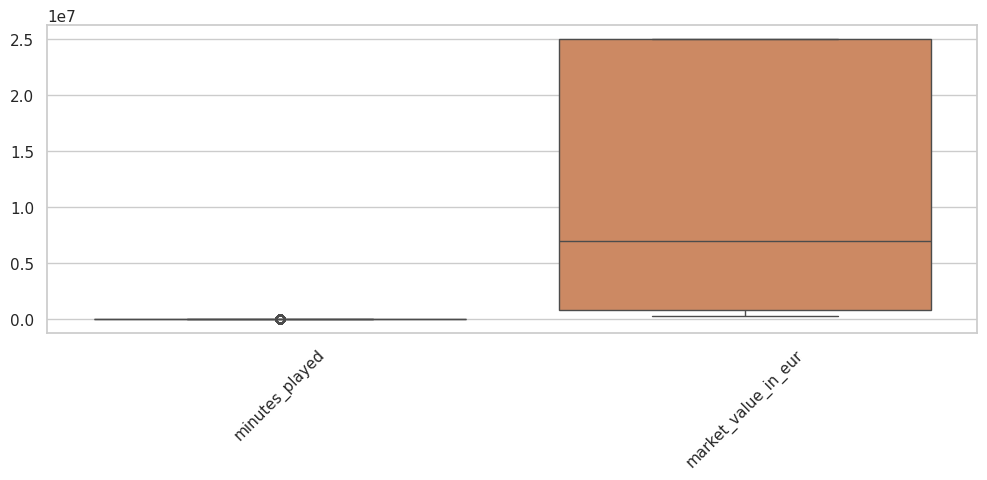

In [ ]:
#Boxplot visualization for finding outliers
sns.boxplot(data=winsorization_df)
plt.gcf().set_size_inches(12,4)
plt.xticks(rotation=45)
plt.show()

**Winsorization technique**

In [ ]:
#winsorization for outlier treatment
def iqr_winsorization(df, thresh=1.5):
    df_out = df.copy()  # Create a copy to avoid modifying original data
    columns_to_treat=df_out.columns
    for col in columns_to_treat:
        # Calculate IQR
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define fences
        lower_fence = Q1 - thresh * IQR
        upper_fence = Q3 + thresh * IQR

        # Winsorize outliers
        df_out.loc[df_out[col] < lower_fence, col] = lower_fence
        df_out.loc[df_out[col] > upper_fence, col] = upper_fence

    return df_out

df = pd.DataFrame(winsorization_df)
# Perform outlier treatment on all columns
selected_treated_df = iqr_winsorization(df.copy())
print(selected_treated_df)

      minutes_played  market_value_in_eur
0               70.0             700000.0
1               70.0             700000.0
2               70.0             700000.0
3               70.0             700000.0
4               70.0             700000.0
...              ...                  ...
4194            77.0             300000.0
4195            77.0             300000.0
4196            77.0             300000.0
4197            77.0             300000.0
4198            77.0             300000.0

[4199 rows x 2 columns]


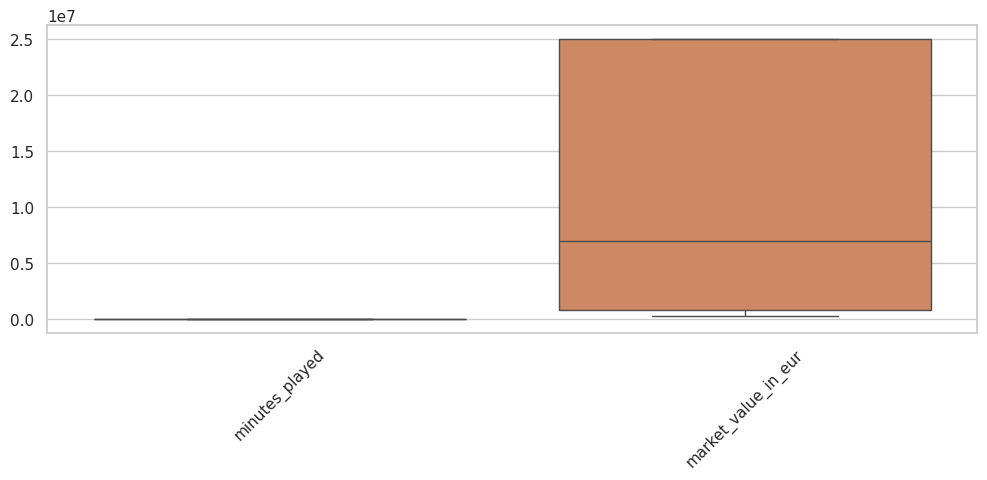

In [ ]:
#check outliers
sns.boxplot(data=selected_treated_df)
plt.gcf().set_size_inches(12,4)
plt.xticks(rotation=45)
plt.show()

**Data Scaling**

In [ ]:
col = selected_treated_df.columns
scaler=StandardScaler()
selected_treated_df=scaler.fit_transform(selected_treated_df)
selected_df_scaled = pd.DataFrame(selected_treated_df,columns=col)
selected_df_scaled

,minutes_played,market_value_in_eur
0,0.004798,-0.977711
1,0.004798,-0.977711
2,0.004798,-0.977711
3,0.004798,-0.977711
4,0.004798,-0.977711
...,...,...
4194,0.319208,-1.014459
4195,0.319208,-1.014459
4196,0.319208,-1.014459
4197,0.319208,-1.014459


***Concating Categorical and Numerical Data***

In [ ]:
selected_df_scaled = pd.concat([selected_df_scaled,df_selected],axis=1)
selected_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   minutes_played       4199 non-null   float64
 1   market_value_in_eur  4199 non-null   float64
 2   team_captain         4199 non-null   int64  
 3   scored_goals         4199 non-null   int64  
 4   position_y_enc       4199 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 164.1 KB


***Multicolinearity***

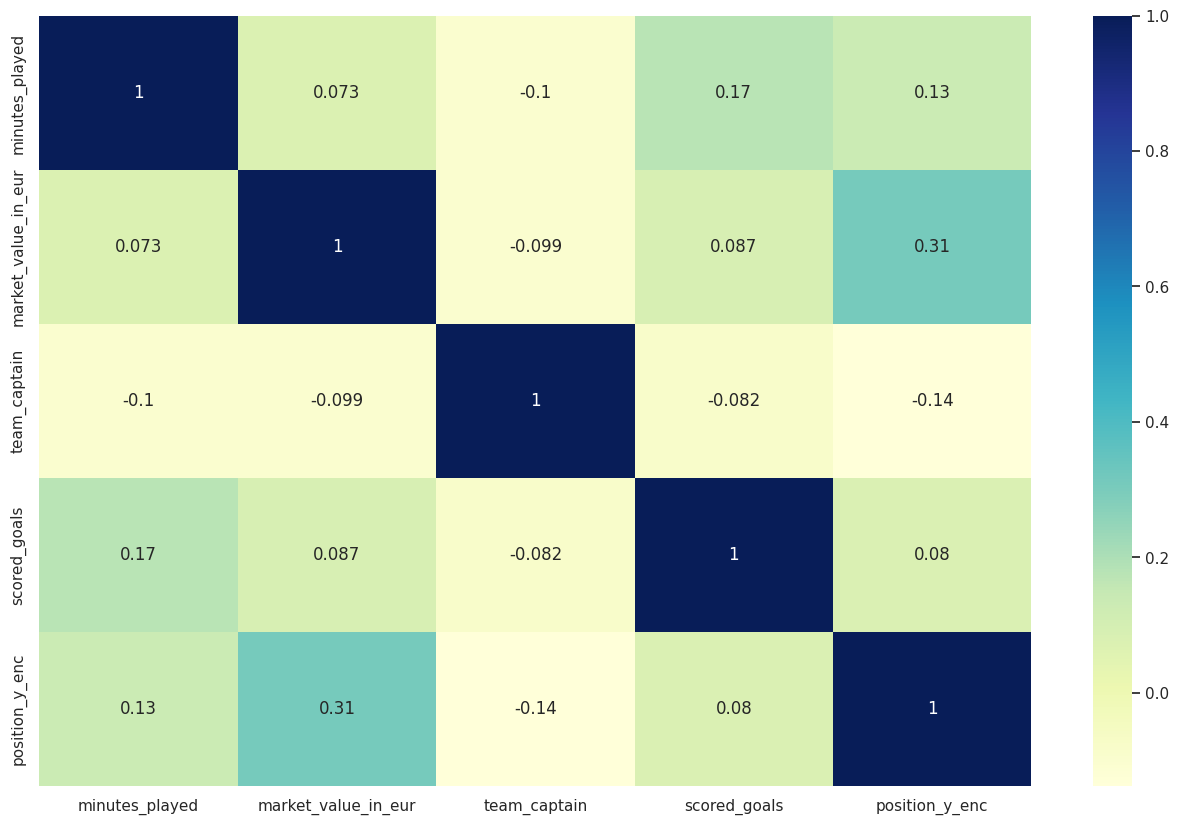

In [ ]:
#Heat map
fig,ax = plt.subplots(1,1,figsize=(16,10))
ax= sns.heatmap(selected_df_scaled.corr(),annot=True,cmap="YlGnBu")

**Interpretation:** Position_y_enc and Market Value: There's a moderate positive correlation (0.31) between the encoded position and market value. This suggests that players in certain positions (likely attacking positions) tend to have higher market values.
Negative Correlations:

Position_y_enc and Scored Goals: There's a weak negative correlation (-0.14) between the encoded position and goals scored. This might indicate that players in certain defensive positions, which are often encoded with lower values, tend to score fewer goals.

***Derive Target variable and Independent variables***

In [ ]:
x = selected_df_scaled.drop(columns='scored_goals',axis=1)
y = selected_df_scaled['scored_goals']

***Data Splitting***

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3359, 4), (840, 4), (3359,), (840,))

***Logistic Regression Training model***

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Using the trained model to predict the outcome of the X_Test dataset
y_pred = logreg.predict(x_test)

## ***Confusion Matrix***

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)

[[483  39]
 [265  53]]
483 39 265 53


***Logistic Regression Evaluation metrics***

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(y_test,y_pred))#Combining the True positive and true negative cases
print('recall:', recall_score(y_test,y_pred)) #Prediction got True negative cases
print('f1-score:', f1_score(y_test,y_pred)) #Prediction for True positive cases
print('precision:', precision_score(y_test,y_pred))# Prediction fot True positive cases

accuracy: 0.638095238095238
recall: 0.16666666666666666
f1-score: 0.25853658536585367
precision: 0.5760869565217391


**Interpretation:**The accuracy is moderate, but this doesn't tell the full story, especially if the classes are imbalanced.
Recall is low, meaning the model is failing to identify most of the positive instances
Precision is better than recall, suggesting that when the model predicts positive, it has a reasonable chance of being correct.
F1-score is low, indicating that the overall performance of the model is unbalanced

### ***ROC Score***

In [ ]:

from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1])
roc

0.5845773392129932

***ROC CURVE***

<Figure size 1000x800 with 0 Axes>

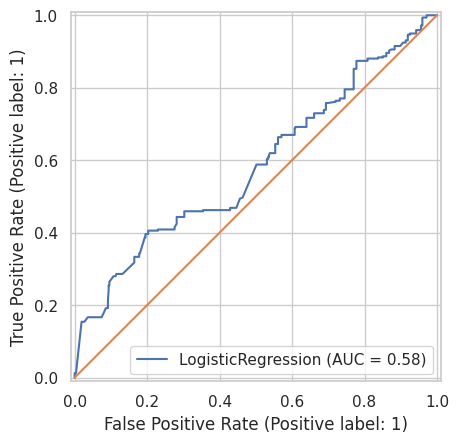

In [ ]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10,8))
#plot_roc_curve(logreg,X_test,Y_test, color='orange')
RocCurveDisplay.from_estimator(logreg, x_test, y_test)
plt.plot([0,1],[0,1])
plt.show()

**Interpretation:**
An ROC score of 0.584 indicates a moderately good model, with its ability to distinguish between classes being better than random but still room for improvement.